<a href="https://colab.research.google.com/github/houlinhe/houlinhe/blob/main/Preparation_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane --upgrade
!pip install matplotlib 
!pip install qiskit
!pip install kdtree==0.16

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import pickle 
from math import *
import dill as pickle
import kdtree 
# import qiskit
# from qiskit import QuantumCircuit, transpile
# from qiskit.quantum_info import Operator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

# Step 1: Solovay-Kitaev Algorithm Implementation
### Implementation can be done either by:


*   Using `solovay_kitaev_algorithm` function below
*   **Preferred:** Using the `newsynth Haskell` package - https://www.mathstat.dal.ca/~selinger/newsynth/ **- More accurate and stable**



In [ ]:
def determinant(Mat):  #determinant of a 2x2 matrix 
  return (Mat[0][0]*Mat[1][1]-Mat[0][1]*Mat[1][0]) 

def SU2(U):
  t  = complex(0,0) 
  t = t + determinant(U)
  globalPhase = (1/t)**0.5  
  return U*globalPhase

# define gates
PI = acos(-1.0)

# Library Gates ............................
H = np.array([[1 , 1],[1 , -1]])/sqrt(2) # Hadamard  
T = np.array([[cos(PI/8)-1j*sin(PI/8) , 0],[0 , cos(PI/8)+1j*sin(PI/8)]]) # Phase Gate 
I = np.array([[1,0],[0,1]]) # Identity matrix	
S = np.matmul(T,T)
s = S.transpose().conjugate() # S dagger as s
t = T.transpose().conjugate() # T dagger as t 
h = H.transpose().conjugate()
#Library Gates ............................


# PAULI GATES
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]]) 
Z = np.array([[1,0],[0,-1]])
# PAULI GATES 

# Convert all the unitary matrix to a matrix in SU(2) 
H = SU2(H) 
h = SU2(h)
T = SU2(T)
I = SU2(I)
S = SU2(S)
s = SU2(s)
t = SU2(t)	
X = SU2(X)
Y = SU2(Y)
Z = SU2(Z)
# Convert all the unitary matrix to its SU(2)

In [ ]:
def create_kdtree():
  PI = acos(-1.0)  
  basic_gates_sequences = []
  l0 = 7 # This param influence the accuracy 7 looks to be the closest, with T = 35, and T^+ = 29, H = 30
  
  #Creating a class to add a payload to the tuple object to be sent to kdtree 
  class Sequence(object): # class to hold the record of the matrix in SU(2) and its payload string 
    def __init__(self,r1,c1,r2,c2,payload):
      self.coords = (r1,c1,r2,c2)
      self.payload = payload 
    
    def __len__(self): 
      return len(self.coords)

    def __getitem__(self,i):
      return self.coords[i]
    def __repr__(self):
      return 'Sequence({},{},{},{},{})'.format(self.coords[0],self.coords[1],self.coords[2],self.coords[3],self.payload)


  def GenerateUtil(gates,prefix,n,l): 
    
    if(l==0):
      k = len(basic_gates_sequences)  
      # tag the matrix to it
      mat = np.array([[1,0],[0,1]])		
      # print(3**13-k) # count down timer  
      for i in range(l0):
        if(prefix[l0-i-1] == "H"): mat = np.matmul(H,mat) 
        if(prefix[l0-i-1] == "T"): mat = np.matmul(T,mat)	
        if(prefix[l0-i-1] == "S"): mat = np.matmul(S,mat)		 					
      
        # Unroll the matrix and tuple it 
      r1 = mat[0][0].real
      c1 = mat[0][0].imag
      r2 = mat[0][1].real
      c2 = mat[0][1].imag		
        # basic_gates_sequences[k] = (prefix,mat)
              
      pts = Sequence(r1,c1,r2,c2,prefix) # a,bz,by,bx 
      basic_gates_sequences.append(pts) 
          
      return 

    for i in range(n):
      newPrefix = prefix + gates[i]	
      GenerateUtil(gates,newPrefix,n,l-1)


  def Generate_Sequences(gates,l):
    n=len(gates)
    GenerateUtil(gates,"",n,l)
    
  #known_gates = ['H','I','T','S','s','t'] # Hadamard,Identity,Phase-gate and their adjoints..
  known_gates = ['H','T','S'] # Hadamard,Identity,Phase-gate 

  

  Generate_Sequences(known_gates,l0)   

  KD_Tree  = kdtree.create(basic_gates_sequences) # create the KDTree 


  pickle_out = open("kdtree.pickle","wb") 
  pickle.dump(KD_Tree,pickle_out) # dump into pickle file 
  pickle_out.close() #close 



create_kdtree()

In [ ]:
def solovay_kitaev_algorithm(gate, depth = 10):
  '''
    Referring to the paper: - https://arxiv.org/pdf/quant-ph/0505030.pdf
                            - https://github.com/DEBARGHYA4469/quantum-compiler/blob/master/Solovay_Kitaev/recur_sk.py


    Current best apporximation - `l0` in create_kdtree() = 7
                   - depth = 2

    Inputs:     - operations: one of the gates in U(theta), generated by qml.matrix(op)

    Outputs:    - circuits: the decomposition of circuits
  '''

  '''
    Helper functions
      Refer to - https://github.com/DEBARGHYA4469/quantum-compiler/blob/master/Solovay_Kitaev/recur_sk.py
  '''
  def dagger(Mat):
    return Mat.transpose().conjugate()
   
  def dagger_seq(sequence):
    ll  = len(sequence)
    new_sequence = "" 
    for i in range(ll):
      if(sequence[i]=="H"): new_sequence = 'h' + new_sequence 
      if(sequence[i]=="h"): new_sequence = 'H' + new_sequence
      if(sequence[i]=="T"): new_sequence = 't' + new_sequence
      if(sequence[i]=="t"): new_sequence = 'T' + new_sequence
      if(sequence[i]=="I"): new_sequence = 'I' + new_sequence
      if(sequence[i]=="s"): new_sequence = 'S' + new_sequence
      if(sequence[i]=="S"): new_sequence = 's' + new_sequence
    return new_sequence 
  def commutator(V,W): # multiplicative group commutator
    return np.matmul(V,np.matmul(W,np.matmul(dagger(V),dagger(W))))
  def Unit(a,b,c,d):
    return np.array([[complex(a,-1.*d),complex(-1.*c, -1.*b) ],[complex(c,-1.*b) ,complex(a,d)]])
  def diagonalize(U):            # Diagonalize a matrix 
    w1,v1 = np.linalg.eig(U)
    return w1,v1
  def sendSimilar(U) : # main funtion for group commutator decompose 
    I = U[0][0].real 
    X = (-1)*(U[1][0].imag)
    Y = U[1][0].real
    Z = (-1)*(U[0][0].imag)

    s   =  pow((1.- I)/2,0.25)
    c   =  sqrt(1.- pow(s,2))
    
    nn  =  sqrt(1 - pow(I,2))
    nx  =  X / nn 
    ny  =  Y / nn 
    nz  =  Z / nn 
    mn  =  sqrt(1. - pow(I,2))
    mx  =  2*pow(s,3)*c/mn
    my  =  -2*pow(s,3)*c/mn
    mz  =  -2*pow(s,2)*pow(c,2)/mn

    x = (nx + mx)/2 
    y = (ny + my)/2
    z = (nz + mz)/2
  
    n = sqrt(x*x+y*y+z*z)
    x=x/n
    y=y/n
    z=z/n
    V = Unit(c,s,0,0)
    W = Unit(c,0,s,0)
    S = Unit(0,x,y,z)
    Vt = np.matmul(S,np.matmul(V,dagger(S)))
    Wt = np.matmul(S,np.matmul(W,dagger(S)))
    
    
    w1,v1  = diagonalize(U)
    w2,v2  = diagonalize(commutator(Vt,Wt))
    return Vt,Wt

  def multiply(seq):
    M = I
    l = len(seq)
    for i in range(l):
      if(seq[l-i-1]=="H"): M = np.matmul(H,M)				
      if(seq[l-i-1]=="T"): M = np.matmul(T,M)
      if(seq[l-i-1]=="S"): M = np.matmul(S,M)
      if(seq[l-i-1]=="s"): M = np.matmul(s,M)
      if(seq[l-i-1]=="t"): M = np.matmul(t,M)
      if(seq[l-i-1]=="h"): M = np.matmul(h,M)			
    return M 
    
  '''
    Calculate Approximations
  '''

  def GC_Approx_Decompose(U):
    Vt,Wt = sendSimilar(U)	
    V = commutator(Vt,Wt)
    w1,v1  = diagonalize(U)
    w2,v2  = diagonalize(V)
    if( abs(w1[0].imag-w2[0].imag) < 0.000001 ): # same permute
      # Eigen values same ...........................................................
      K = SU2(np.matmul(v2,np.matmul( np.array([[w2[0],0],[0,w2[1]]]) ,dagger(v2))))
      S=np.matmul(v1,dagger(v2))		
      Unew = np.matmul(S,np.matmul(K,dagger(S)))
      Vt = np.matmul(S,np.matmul(Vt,dagger(S)))
      Wt = np.matmul(S,np.matmul(Wt,dagger(S)))	
      return Vt,Wt
    else:
      # Eigen values swapped ....................................................
      v2 = np.array([[v2[0][1],v2[0][0]],[v2[1][1],v2[1][0]]])
      S=np.matmul(v1,dagger(v2))		
      Vt = np.matmul(S,np.matmul(Vt,dagger(S)))
      Wt = np.matmul(S,np.matmul(Wt,dagger(S)))
      Unew = np.matmul(S,np.matmul(V,dagger(S)))		
      return Vt, Wt

  '''
    Used when depth = 0
  '''

  def matrix_unroll(Gate):
    r1 = Gate[0][0].real
    c1 = Gate[0][0].imag
    r2 = Gate[0][1].real
    c2 = Gate[0][1].imag	
    return [r1,c1,r2,c2]

  def basic_approx(U,e0):
    pin = open("kdtree.pickle","rb") 
    pin = pickle.load(pin) # pickle_in
    unroll = matrix_unroll(U) 
    R= pin.search_nn(unroll)
    coords = R[0].__dict__['data'].__dict__['coords']
    R_sequence = R[0].__dict__['data'].__dict__['payload']
    return R_sequence 

  circuits = []

  # wires = gate.wires.tolist()
  # theta = gate.parameters

  if (depth == 0):
    # The case that return the closest gate for the gate set
    operation = qml.matrix(qml.Hadamard(wires=0))
    circuits.append(operation)
    return basic_approx(gate, 0.1), circuits

  else:
    U_n1, U_n1_l = solovay_kitaev_algorithm(gate, depth = depth-1)
    U_n1Value = multiply(U_n1)
    V, W = GC_Approx_Decompose(np.dot(gate, dagger(U_n1Value)))

    V_n1, V_n1_l = solovay_kitaev_algorithm(V, depth = depth-1)
    W_n1, W_n1_l = solovay_kitaev_algorithm(W, depth = depth-1)

    U_now  = V_n1 + W_n1 + dagger_seq(V_n1) + dagger_seq(W_n1) + U_n1

    return U_now, circuits

In [ ]:
c, d= solovay_kitaev_algorithm(qml.matrix(qml.RX(5.57, wires=0)), depth = 2)
print(c)
print()
countH = 0
countT = 0
countt = 0
for item in [*c]:
  if item == 'H':
    countH += 1
  elif item == 'T':
    countT += 1
  elif item == 't':
    countt += 1

print("Number of `T` gates: ", countT)
print("Number of `T^+` gates: ", countt)
print("Number of `H` gates: ", countH)

# The number of gadgets we need to prepare on the RX(5.57) rotation
L = countT + countt

HTHSSSSHHTTTSSsssshthssttthhSHTHTTHHTTSSTHTHSHTHShtsstthshthshtTHTHSHThtththsHHTTTSSHTHSSSSssttthhsssshththshthtTHSHTHSHTTSSTHshthshthtsstthTHSHTHSHTSHTHTshthshtththsthTTTTSTT

Number of `T` gates:  35
Number of `T^+` gates:  29
Number of `H` gates:  30


# Step 2: Mock Trapdoor Function Implementation

*   Two Way Regular - y = f(x1) = f(x2)
*   Collision Resistant - x1 != x2

In [ ]:
def mockTrapDoors(K, n):
  '''
    Input:
      K - the number of trapdoor function required
      n - the length of input to an trapdoor function

    Output:
      trapdoors - the collection of trapdoor functions - currently input and output have the same length
      trapdoorInfo - the trapdoor information, in our case, the index of the random list, in range K
      randomList - the random list

    Currently, assume function has same length of input and output

  '''

  # assume the output length of the trapdoor function to be mu
  mu = floor(K**2 / n)
  randomList = [random.sample(range(0, K**2), n) for k in range(K)] # K lists of size n  [ random.sample(range(0, K**2), n) for k in range(K)]
  trapdoors = []
  trapdoorInfor = []

  # if f is a trapdoor function, then there exists some secret information t, such that given f(x) and t, it is easy to compute x(input)

  for k in range(K):
    random_i = (k + 15) % K # shift right by 15, used as randomList index
    trapdoorInfor.append(random_i)

    extendList = list(np.squeeze(randomList[random_i]))

    def _(input, k=k, extendList=extendList):
      # sum up, then mod
      # reverse if 1 appear at the end faster

      # Indicate the input is symetric
      b = 1

      inputClone = input
      input_r = []
      for i in range(len(input)):
        input_r.append(input[len(input)-1-i])
      for i in range(len(input)):
        if input[i] > input[len(input)-1-i]:
          inputClone = input
          b = 0
          break
        elif input[i] < input[len(input)-1-i]:
          inputClone = input_r
          b = 0
          break
      
      if b == 1:
        input_add1 = [(int(x)+1)%2 for x in inputClone]
        for i in range(len(input_add1)):
          if input_add1[i] > inputClone[i]:
            inputClone = input_add1
            break
          elif input_add1[i] < inputClone[i]:
            break

      output = list([int((x1 + y1) % 2) for x1, y1 in zip(inputClone, extendList)])

      return output

    trapdoors.append(_)
  
  return trapdoors, trapdoorInfor, randomList

# Used to generate the function, fk, and trapdoor, tk
def Gen(k, trapdoors, trapdoorInfor, randomList):
  '''
    k - index
  '''
  random_index = trapdoorInfor[k]
  trapdoor = randomList[random_index]
  trapdoorFunc = trapdoors[k]

  return trapdoorFunc, trapdoor

# Used to retrieve the original input, x {0, 1}^n
def Inv(k, trapdoor, output):
  input = [(x1 - y1) % 2 for x1, y1 in zip(trapdoor, output)]
  input_r = []
  for i in range(len(input)):
    input_r.append(input[len(input)-1-i])

  if input == input_r:
    input_in = []
    for j in input:
      input_in.append((j+1)%2)
    for i in range(len(input_in)):
      if input[i] > input_in[i]:
        input_r = input_in
        break
      elif input[i] < input_in[i]:
        input_r = input
        input = input_in
        break
  return input, input_r

Now we have to create a dictionary for **GenGadget**.
The dictionary should consider all the input situations for the equation:
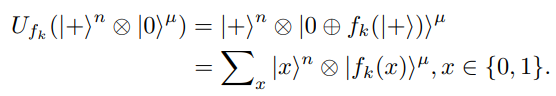

In [ ]:
def createDic(K, n):
  '''
    Input:
      K - the number of trapdoor function required
      n - the length of input to an trapdoor function

    dic_l: a list of dic. 'dic' has both 'key'(input) as list and 'value'(output) as list - forward
    dic_lr: a list of dic. 'dic' has both 'key'(input) as list and 'value'(output) as [list,list] - reversed
  '''

  trapdoors, trapdoorInfor, randomList = mockTrapDoors(K,n)

  # The largest number can be realized
  l = 2**(n+1)-1

  # decimal -> n bits binary
  binn = lambda x : ''.join(reversed([str((x >> i)&1) for i in range(n)]))

  dic_l = []
  dic_lr = []

  for k in range(len(trapdoors)):
    trapdoorFunc, trapdoor = Gen(k, trapdoors, trapdoorInfor, randomList) #trapdoor is the trapdoor information
    dic = {}
    dic_r = {}
    for i in range(l+1):
      #forward
      n_bi = binn(i)
      n_bi = [int(item) for item in n_bi]
      out = trapdoorFunc(n_bi)
      dic[tuple(n_bi)] = out

      #backward
      in1, in2 = Inv(k, trapdoor, out)
      dic_r[tuple(out)] = [in1,in2]
    dic_l.append(dic)
    dic_lr.append(dic_r)

  return dic_l, dic_lr

# Step 3: GenGadget Input Generation

*   Generate input for **GenGadget** function

In [ ]:
def alphaGen(n):
  # n is the length of input to the trapdoor function
  return [random.randint(0, 1) for i in range(n)]

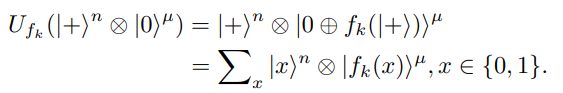

In [ ]:
def UnitaryOperation(dic, k):
  '''
    dic - the list of dictionary key is a tuple
    k - the index
  '''
  # Deutsch’s algorithm
  # Being used at step 1

  x_wire = []
  y_wire = []

  x_len = len(list(list(dic[k].keys())[0]))
  # value is a list
  y_len = len(list(dic[k][list(dic[k].keys())[0]]))

  for wire in range(x_len):
    x_wire.append(wire)
  
  for wire in range(x_len, x_len+y_len):
    y_wire.append(wire)

  # X set-up
  for wire in x_wire:
    qml.Hadamard(wires=wire)

  for key in dic[k]:
    value = dic[k][key]
    key = list(key)
    # converted to int list
    key = [int(i) for i in key]
    value = [int(i) for i in value]
    
    for count, digit in enumerate(value):
      # as b is initially 0
      if int(digit) == 1:
        qml.ctrl(qml.PauliX, control=x_wire, control_values=key)(wires=count+x_len)

  '''
    value of x and y are not determined yet
  '''

  return x_wire, y_wire
  

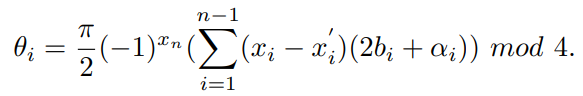

In [ ]:
# Need to run 2m times to get 2m theta
# def GenGadget_Input_Prep(n, trapDoors, trapDoorInfo, k, m):
def GenGadget_Input_Prep(n, dic, dic_r, k, m):
  # m from security params k and p
  # We are assuming the trapDoor functions, as no appropriate quantnum-secure, two-regular and collision resistant trapdoor functions are found, and they are out of scope
  '''
    Input:
      n - a number - length of alpha etc...
      dic, dic_r - the 'list' of dictionary
      k - security parameter
      m - 2m is the number of qubits need to be generated

    Output:
      measurements?
      need the length of alpha, value - n
  '''
  
  # alpha - {a1, a2, ..., an-1}, ai - {0, 1}
  alpha = alphaGen(n)

  #m = len(k)
  # assume mu = n
  mu = n # .........
  
  thetas = []

  x_wire = []
  y_wire = []

  x_len = len(list(list(dic[k].keys())[0]))
  # value is a list
  y_len = len(list(dic[k][list(dic[k].keys())[0]]))

  # Deutsch’s algorithm
  # Being used at step 1

  for wire in range(x_len):
    x_wire.append(wire)

  for wire in range(x_len, x_len+y_len):
    y_wire.append(wire)

  for i in range(2*m):
    dev = qml.device("default.qubit", wires=n+mu, shots=1)
    @qml.qnode(dev)
    def GenInput():
      '''
        dic - the list of dictionary key is a tuple
        k - the index
      '''

      # X set-up
      for wire in x_wire:
        qml.Hadamard(wires=wire)

      for key in dic[k]:
        value = dic[k][key]
        key = list(key)
        # converted to int list
        key = [int(i) for i in key]
        value = [int(i) for i in value]
        
        for count, digit in enumerate(value):
          # as b is initially 0
          if int(digit) == 1:
            qml.ctrl(qml.PauliX, control=x_wire, control_values=key)(wires=count+x_len)

      '''
        Continue here
      '''
      # Return params
      y_measurement = []
      b_measurement = []
      # Measure in this basis require S rotation first
      for count, index in enumerate(x_wire):
        # All but last qubit
        if count < len(x_wire)-1:
          if alpha[count] == 1:
            qml.S(wires=[index])
      # Step 2 - measure in 2nd reg sample/expval?
      for index in y_wire:
        #y_measurement.append(qml.sample(qml.PauliZ(wires=[index])))
        y_measurement.append(index)

      #Step 3 -> +- ?? - measure in first reg
      for count, index in enumerate(x_wire):
        # All but last qubit
        if count < len(x_wire)-1:
          b_measurement.append(index)
          # if alpha[count] == 1:
          #   b_measurement.append(qml.sample(qml.PauliZ(wires=[index]))) # In PauliZ?
          # else:
          #   b_measurement.append(qml.sample(qml.PauliZ(wires=[index]))) # In PauliZ?

      reg2 = []
      # for wire in y_measurement:
      #   v = qml.expval(qml.PauliZ(wires=wire))
      #   reg2.append(v)
      # for wire in b_measurement:
      #   v = qml.expval(qml.PauliZ(wires=wire))
      #   reg2.append(v)

      for wire in y_measurement:
        v = qml.sample(qml.PauliZ(wires=wire))
        reg2.append(v)
      for wire in b_measurement:
        v = qml.sample(qml.PauliZ(wires=wire))
        reg2.append(v)

      return reg2
      # return qml.sample(qml.PauliZ(wires=y_measurement)), qml.sample(qml.PauliZ(wires=b_measurement))

    # Step 1: X - 1st reg. Y - 2nd reg.
    # Sum_x |x>^n x |f(x)>^mu
    # x_wire, y_wire = UnitaryOperation(dic, k)
    reg2 = GenInput()

    print(qml.draw(GenInput)())

    y_measurement = [int(things) for things in reg2[0:len(x_wire)]]
    b_measurement = [int(things) for things in reg2[len(x_wire):]]

    print(y_measurement)
    print(b_measurement)

    # Assume the nth bit of xn and x'n are different
    # they should have length of n - need double check
    x, x_n = dic_r[k][tuple(y_measurement)]
    # Step 4:
    if x[n-1] != x_n[n-1]:
      int_value = 0
      for i_n in range(n-1):
        int_value += (int(x[i_n])-int(x_n[i_n]))(2*int(b_measurement[i_n])+alpha[i_n])

      int_value = int_value % 4
      theta = np.pi/2*(-1)**int(x[n-1])*int_value # SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
      thetas.append(theta) #TODO check excluding the case that |+pi/2> and |+3pi/2>?????
    else:
      # as no result it acquired
      i -= 1

  return thetas

In [ ]:
# GenGadget_Input_Prep(n, dic, dic_r, k, m)
GenGadget_Input_Prep(5, a, b, 2, 3)

0: ──H─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○─╭○
1: ──H─├○─├○─├○─├○─├○─├○─├○─├○─├○─├○─├○─├○─├○─├○─├○─├○─├●─├●─├●─├●─├●─├●─├●─├●─├●─├●─├●─├●─├●─├●─├●
2: ──H─├○─├○─├○─├○─├○─├○─├○─├●─├●─├●─├●─├●─├●─├●─├●─├●─├○─├○─├○─├○─├○─├○─├○─├●─├●─├●─├●─├●─├●─├●─├●
3: ──H─├○─├○─├○─├○─├●─├●─├●─├○─├○─├○─├○─├●─├●─├●─├●─├●─├○─├○─├○─├●─├●─├●─├●─├○─├○─├○─├○─├○─├●─├●─├●
4: ──H─├○─├○─├○─├○─├○─├○─├●─├○─├○─├○─├●─├○─├○─├○─├●─├●─├○─├○─├●─├○─├○─├●─├●─├○─├○─├○─├●─├●─├○─├●─├●
5: ────│──│──│──│──╰X─│──│──│──│──│──│──╰X─│──│──│──│──╰X─│──│──│──│──│──│──╰X─│──│──│──│──│──│──│─
6: ────╰X─│──│──│─────╰X─╰X─╰X─│──│──│─────╰X─│──╰X─│─────╰X─│──│──│──╰X─│─────╰X─│──│──│──│──╰X─│─
7: ───────╰X─│──│──────────────│──│──╰X───────╰X────╰X───────│──╰X─│─────│────────╰X─╰X─│──│─────╰X
8: ──────────╰X─│──────────────╰X─│──────────────────────────╰X────│─────╰X─────────────╰X─│───────
9: ─────────────╰X────────────────╰X───────────────────────────────╰X──────────────────────╰X──────


KeyError: ignored

The function **GenThetaQubits** is used to generate the qubit curcuit with the **thetas** being provided
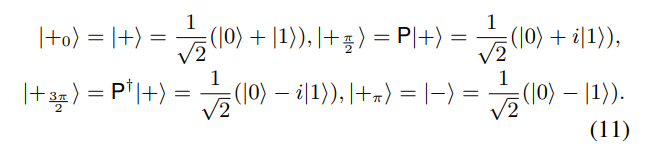

In [ ]:
def GenGadget(thetas, sk):
  '''
    Input:
      thetas - a list of theta value
      sk - security key

    Output:
      measurements?
      need the length of alpha, value - n
  '''

  m2 = len(thetas)
  m = m2/2

  dev = qml.device("default.qubit", wires=m2, shots=None)
  @qml.qnode(dev)
  def GenThetaQubits(thetas, m):
    # Generating the 2m qubits in |+theta> state

    for i in range(2*m):
      qml.Hadamard(wires=i)

    for i, theta in enumerate(thetas):
      if theta == np.pi/2:
        qml.S(wires=i)
      elif theta == np.pi:
        qml.RZ(np.pi, wires=i)
      elif theta == 3*np.pi/2: #P+ case
        qml.RZ(3*np.pi/2, wires=i)

  GenThetaQubits(thetas, m)

  alice_div = [] # [(s,t),(s,t)...] wire number
  alice_div_t = [] # [(s-theta, t-theta)]

  for i in range(0, m2, 2):
    # Alice divides them into two sets - disjoint pairs
    alice_div.append([i, i+1])
    alice_div_t.append([thetas[i], thetas[i+1]])

  # p ∈ {0, 1}m is a string of m bits
  p = [random.randint(0, 1) for i in range(m)]
  # create the information pair
  gsk = (alice_div, p, sk)

  #  Bob performs (IxH)CZ - s control bit, t target bit?
  for pair in alice_div:
    qml.CZ(wires=[pair[0],pair[1]])
    qml.Hadmard(wires=pair[1])

  # x_l, z_l, p_l
  x_l = []
  z_l = []
  p_l = []

  # In order to more convinient data collection
  # circuit is created this way
  # Being separated to 8 cases, eq (12)
  # |Φ+> = 1/root(2) (|00>+|11>)
  # why control bit = pi/2 and 3pi/2 are not considered??? CZ(|+pi/2> x |+pi/2>)???
  for count, item in enumerate(alice_div_t):
    # Case |+> ⊗ |+>
    if (item[0] == 0 and item[1] == 0):
      x_l.append(0)
      z_l.append(0)
      p_l.append(0)
    # Case |+> ⊗ |->
    elif (item[0] == 0 and item[1] == np.pi):
      x_l.append(0)
      z_l.append(1)
      p_l.append(0)
    # Case |-> ⊗ |+>
    elif (item[0] == np.pi and item[1] == 0):
      x_l.append(1)
      z_l.append(0)
      p_l.append(0)
    # Case |-> ⊗ |->
    elif (item[0] == np.pi and item[1] == np.pi):
      x_l.append(1)
      z_l.append(1)
      p_l.append(0)

    # Case |+> ⊗ |3/2pi>
    elif (item[0] == 0 and item[1] == 3*np.pi/2):
      x_l.append(0)
      z_l.append(0)
      p_l.append(1)
    # Case |+> ⊗ |pi/2>
    elif (item[0] == 0 and item[1] == np.pi/2):
      x_l.append(0)
      z_l.append(1)
      p_l.append(1)
    # Case |-> ⊗ |3/2pi>
    elif (item[0] == np.pi and item[1] == 3*np.pi/2):
      x_l.append(1)
      z_l.append(0)
      p_l.append(1)
    # Case |-> ⊗ |pi/2>
    elif (item[0] == np.pi and item[1] == np.pi/2):
      x_l.append(1)
      z_l.append(1)
      p_l.append(1)
    else:
      x_l.append(None)
      z_l.append(None)
      p_l.append(None)


  




# TESTING!!!

In [ ]:
a,b = createDic(5,5)

In [ ]:
# GenGadget_Input_Prep(n, dic, dic_r, k, m)
GenGadget_Input_Prep(5, a, b, 2, 3)

['(', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ')']
['[', '0', ',', ' ', '1', ',', ' ', '1', ',', ' ', '1', ',', ' ', '1', ']']


ValueError: ignored

In [ ]:
qml.PhaseShift(5/4, wires=0)

In [ ]:
K = 10
n = 12
J = [ random.sample(range(0, K**2), n) for k in range(K)]
o = [ random.sample(range(0, K**2), n) for k in range(K)]
print(J)

print(o)

print([[(x1 + y1) % 2 for x1, y1 in zip(x, y)] for x, y in zip(J, o)])

[[9, 90, 79, 89, 82, 0, 5, 74, 37, 47, 80, 86], [54, 84, 81, 77, 98, 6, 17, 99, 41, 19, 60, 61], [16, 52, 88, 78, 61, 21, 11, 19, 15, 42, 0, 45], [44, 0, 65, 7, 27, 82, 85, 54, 3, 6, 93, 26], [51, 4, 36, 56, 7, 94, 90, 50, 92, 67, 23, 17], [82, 77, 38, 83, 17, 80, 66, 16, 10, 44, 79, 2], [81, 88, 94, 60, 66, 27, 77, 24, 63, 38, 45, 89], [50, 5, 96, 67, 2, 63, 22, 1, 61, 87, 20, 28], [35, 96, 26, 77, 66, 55, 34, 93, 39, 19, 95, 72], [36, 28, 0, 15, 93, 76, 66, 18, 40, 45, 83, 50]]
[[36, 54, 59, 1, 9, 4, 43, 47, 18, 12, 11, 31], [79, 51, 77, 32, 17, 27, 22, 16, 70, 44, 11, 78], [67, 17, 37, 97, 63, 72, 84, 32, 99, 96, 29, 14], [38, 18, 52, 39, 84, 69, 35, 20, 71, 59, 23, 8], [81, 65, 49, 30, 10, 44, 98, 63, 76, 32, 99, 50], [76, 86, 9, 61, 11, 92, 96, 67, 87, 54, 98, 55], [82, 61, 58, 11, 57, 70, 42, 43, 46, 52, 95, 29], [74, 67, 11, 32, 40, 3, 78, 83, 46, 24, 52, 56], [80, 70, 82, 21, 36, 41, 11, 66, 39, 64, 38, 10], [65, 94, 97, 48, 36, 2, 19, 84, 82, 66, 40, 43]]
[[1, 0, 0, 0, 1, 0, 0

In [ ]:
def Gen()

In [ ]:
# Trapdoor function -> one way
def generate_key_pair(nbits):
    p = random_prime(nbits // 2)
    q = random_prime(nbits // 2)
    n = p * q
    phi = (p - 1) * (q - 1)
    e = 65537  # a common choice for the encryption exponent
    d = pow(e, -1, phi)  # compute the decryption exponent using the modular inverse function
    return ((n, e), (n, d))

def encrypt(m, pubkey):
    n, e = pubkey
    c = pow(m, e, n)
    return c

def decrypt(c, privkey):
    n, d = privkey
    m = pow(c, d, n)
    return m

# Example usage
pubkey, privkey = generate_key_pair(2048)

# many possible choices of prime numbers p and q
# we can first generate k combinations of prime numbers... so we have F...

# import random

# def generate_key_pair(nbits):
#     p = random_prime(nbits // 2)
#     q = random_prime(nbits // 2)
#     n = p * q
#     phi = (p - 1) * (q - 1)
#     e = 65537  # a common choice for the encryption exponent
#     d = pow(e, -1, phi)  # compute the decryption exponent using the modular inverse function
#     k = random.randint(1, n-1)  # choose a random integer k in the range [1, n-1]
#     tk = pow(k, d, n)  # compute the trapdoor using the private key
#     return ((n, e), (n, d)), k, tk

# # Example usage
# key_pair, k, tk = generate_key_pair(2048)  # generate a key pair with 2048-bit primes and a random trapdoor
# pubkey, privkey = key_pair
# m = 123456789  # a message to encrypt
# c = pow(m, pubkey[1], pubkey[0])  # encrypt the message using the public key
# decrypted = pow(c, privkey[1], privkey[0])  # decrypt the ciphertext using the private key
# print("Original message:", m)
# print("Ciphertext:", c)
# print("Decrypted message:", decrypted)
# print("Trapdoor:", tk)


# import random

# def generate_key_pair(nbits):
#     p = random_prime(nbits // 2)
#     q = random_prime(nbits // 2)
#     n = p * q
#     phi = (p - 1) * (q - 1)
#     e = 65537  # a common choice for the encryption exponent
#     d = pow(e, -1, phi)  # compute the decryption exponent using the modular inverse function
#     k = ''.join(str(random.randint(0, 1)) for _ in range(nbits))  # choose a random bit string of length nbits
#     tk = int(k, 2)  # convert the bit string to an integer
#     tk = pow(tk, d, n)  # compute the trapdoor using the private key
#     return ((n, e), (n, d)), k, tk

# # Example usage
# key_pair, k, tk = generate_key_pair(2048)  # generate a key pair with 2048-bit primes and a random trapdoor
# pubkey, privkey = key_pair
# m = 123456789  # a message to encrypt
# c = pow(m, pubkey[1], pubkey[0])  # encrypt the message using the public key
# decrypted = pow(c, privkey[1], privkey[0])  # decrypt the ciphertext using the private key
# print("Original message:", m)
# print("Ciphertext:", c)
# print("Decrypted message:", decrypted)
# print("Trapdoor:", tk)


In [ ]:
!pip install pyle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyle

In [ ]:
keypair = pyle.HEKeyPair()

AttributeError: ignored

In [ ]:
from pylwe import generate_lwe_keypair, encrypt_lwe, decrypt_lwe
import hashlib

def generate_lwe_trapdoor(lwe_key, k):
    # Compute the trapdoor using the LWE secret key
    n = len(k)
    a, s = lwe_key
    trapdoor = [0] * n
    for i in range(n):
        trapdoor[i] = (k[i] - sum(a[i][j] * s[j] for j in range(n))) % 2
    return trapdoor

def hash_lwe_trapdoor(trapdoor):
    # Hash the trapdoor to produce a collision-resistant output
    h = hashlib.sha256()
    h.update(''.join(str(b) for b in trapdoor).encode('utf-8'))
    return h.digest()

def lwe_one_way_function(x, lwe_key):
    # Compute the LWE function
    a, b = encrypt_lwe(x, lwe_key[0])
    y = b + sum(a[i] * lwe_key[1][i] for i in range(len(a)))
    return y

def lwe_encrypt(x, lwe_key):
    # Encrypt a message using the LWE public key
    a, b = encrypt_lwe(x, lwe_key[0])
    return a, b

def lwe_decrypt(a, b, lwe_key, trapdoor):
    # Decrypt a ciphertext using the LWE private key and trapdoor
    s = lwe_key[1]
    for i in range(len(trapdoor)):
        s[i] = (s[i] + trapdoor[i] * (2 * a[i] - 1)) % 2
    x = decrypt_lwe(a, b, (lwe_key[0], s))
    return x

# Example usage
n = 256  # dimension of the LWE problem
q = 65537  # modulus for the LWE problem
sigma = 8.0 / q  # standard deviation for the LWE problem
lwe_key = generate_lwe_keypair(n, q, sigma)  # generate an LWE key pair
k = [1, 0, 1, 1, 0, 1, 0, 0]  # a random binary string of length n
trapdoor = generate_lwe_trapdoor(lwe_key, k)  # generate the trapdoor using the LWE secret key
hash_trapdoor = hash_lwe_trapdoor(trapdoor)  # compute a collision-resistant output of the trapdoor
x = 123456789  # a message to encrypt
y = lwe_one_way_function(x, lwe_key)  # compute the LWE function of the message
a, b = lwe_encrypt(x, lwe_key)  # encrypt the message using the LWE public key
decrypted = lwe_decrypt(a, b, lwe_key, trapdoor)  # decrypt the ciphertext using the LWE private key and trapdoor
print("Original message:", x)
print("LWE function:", y)
print("Encrypted message:", (a, b))
print("Decrypted message:", decrypted)
print("Trapdoor:", trapdoor)
print("Hashed trapdoor:", hash_trapdoor.hex())

ModuleNotFoundError: ignored